# Developing Intuitions

In [1]:
## %matplotlib inline
import scipy.stats as stats
from IPython.core.pylabtools import figsize
import numpy as np
figsize(12.5, 4)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x = y = np.linspace(0, 5, 100)
X, Y = np.meshgrid(x,y)

### Uniform priors

### Exponential priors

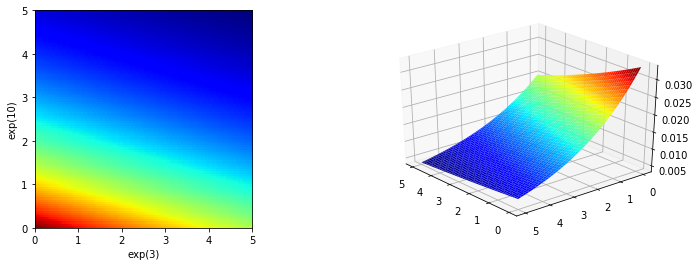

In [18]:
exp_x = stats.expon.pdf(x, scale=3)
exp_y = stats.expon.pdf(y, scale=10)
M = np.dot(exp_x[:, None], exp_y[None, :])

fig = plt.figure()
plt.subplot(121)

plt.imshow(M, origin='lower', cmap=plt.cm.jet, extent=(0, 5, 0, 5))
plt.xlabel('exp(3)')
plt.ylabel('exp(10)')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.jet)
ax.view_init(azim=500)
plt.show()

# print exp_x[:, None].shape
# print exp_y[None, :].shape
# print M.shape

### Updating priors
Suppose these priors represent distributions for the random variables for parameters $\lambda$ of two Poisson distributions. Let's observe a few points and visualize the new landscape:

### 2. Normal Priors

In [14]:
x = y = np.linspace(-5, 5, 100)
norm_x = stats.norm.pdf(x, loc=0, scale=1)
norm_y = stats.norm.pdf(x, loc=0, scale=2)

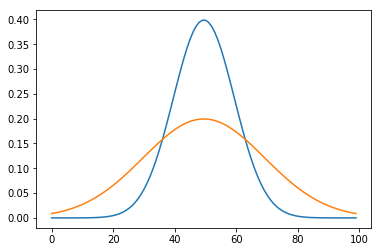

In [15]:
plt.plot(norm_x)
plt.plot(norm_y)
plt.show()

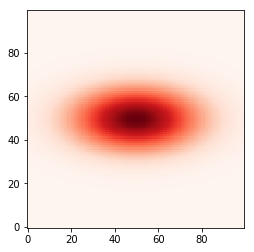

In [16]:
M = np.dot(norm_x[:, None], norm_y[None, :])
plt.imshow(M, cmap=plt.cm.Reds, origin='lower')
plt.show()

In [17]:
print (norm_x[0]* norm_y[-1])
print (M[0, -1])

1.3029833202e-08
1.3029833202e-08


### Compute likelihoods

In [219]:
# Sample size of data observed
N = 1

# These are the true parameters of the Poisson distributions, 
# which we of course do not observe.
lambda_1_true = 1
lambda_2_true = 3

# We only observe the data generated from these distributions
data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1)),
], axis=1)

print ("Observed: %s" % data)

Observed: [[0 3]]


In [ ]:
# Values of lambda for each prior
lambdas_x = lambdas_y = np.linspace(0.01, 5, 100)
likelihood_x = np.array([])

In [74]:
print ( stats.poisson.pmf(k=[[1,2]], mu=3) )
print ( stats.poisson.pmf(k=1, mu=3) * stats.poisson.pmf(k=2, mu=3) )

[[ 0.14936121  0.22404181]]
0.033463154385


In [221]:
# Sample size of data we observe, 
# trying varying this (keep it less than 100 ;)
N = 1
lambda_1_true = 1
lambda_2_true = 3

data = np.concatenate([
    stats.poisson.rvs(lambda_1_true, size=(N, 1)),
    stats.poisson.rvs(lambda_2_true, size=(N, 1))
], axis=1)

print (data)

[[1 5]]


### Posterior with one, 2D observation

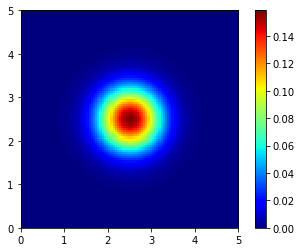

In [334]:
x = y = np.linspace(-5, 5, 100)
norm_x = stats.norm.pdf(x, loc=0, scale=1)
norm_y = stats.norm.pdf(x, loc=0, scale=1)

M = np.dot(norm_x[:, None], norm_y[None, :])
plt.imshow(M, cmap=plt.cm.jet, origin='lower', extent=(0, 5, 0, 5))
plt.colorbar()
plt.show()
# M = np.dot(uni_x[:, None], uni_y[None, :])
# im = plt.imshow(M, interpolation='none', origin='lower', extent=(0, 5, 0, 5), cmap=plt.cm.Reds)
# plt.xlabel('$\lambda_1$')
# plt.ylabel('$\lambda_2$')
# plt.show()

In [335]:
data = [5, 5]

In [336]:
x = y = np.linspace(start=.01, stop=5, num=100)
likelihood_x = np.array([stats.poisson.pmf(data[0], _x)
                        for _x in x])
likelihood_y = np.array([stats.poisson.pmf(data[1], _y)
                        for _y in y])
L = np.dot(likelihood_x[:, None], likelihood_y[None, :])

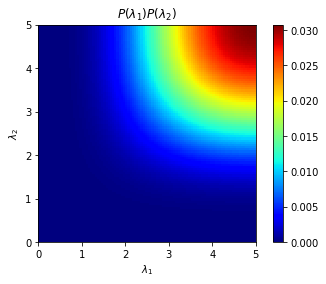

In [337]:
plt.imshow(L, cmap=plt.cm.jet, origin='lower', extent=[0, 5, 0, 5])
plt.xlabel('$\lambda_1$')
plt.ylabel('$\lambda_2$')
plt.title('$P(\lambda_1) P(\lambda_2)$')
plt.colorbar()
plt.show()

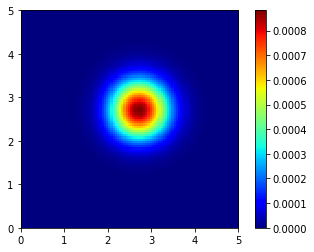

In [338]:
plt.imshow(M * L, interpolation='none', origin='lower', cmap=plt.cm.jet, extent=(0, 5, 0, 5))
plt.colorbar()
plt.show()

In [339]:
plt.scatter(lambda_2_true, lambda_1_true, c="k", s=50, edgecolor="none")

In [50]:
plt.scatter(data, c="p")

TypeError: scatter() takes at least 2 arguments (2 given)

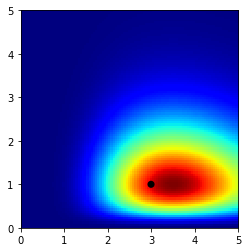

In [49]:
plt.show()

In [59]:
stats.poisson.rvs(lambda_1_true, size=(N, 1))

array([[0],
       [1],
       [2]])

### As dot product

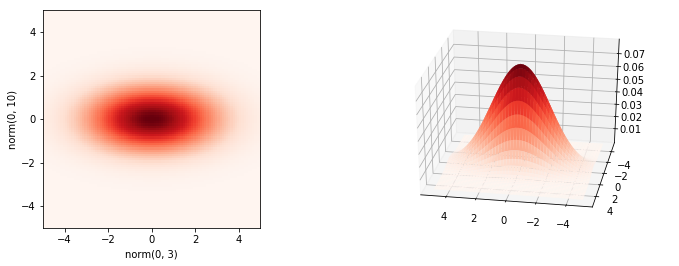

In [86]:
x = y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x,y)  

norm_x = stats.norm.pdf(x, loc=0, scale=1)
norm_y = stats.norm.pdf(y, loc=0, scale=2)
M = np.dot(norm_x[:, None], norm_y[None, :])

fig = plt.figure(figsize=(12, 4))
plt.subplot(121)

plt.imshow(M, cmap=plt.cm.Reds, extent=(-5, 5, -5, 5))
plt.xlabel('norm(0, 3)')
plt.ylabel('norm(0, 10)')

ax = fig.add_subplot(122, projection='3d')
ax.plot_surface(X, Y, M, cmap=plt.cm.Reds)
ax.view_init(azim=100)
plt.show()

In [87]:
### Compute covariance matrix
XY = np.vstack((norm_x, norm_y)).transpose()
print ( np.cov(norm_x, norm_y) )
print ( np.var(norm_x) )
print ( np.var(norm_y) )
print ( np.corrcoef(norm_x, norm_y) )

[[ 0.01830949  0.00805562]
 [ 0.00805562  0.00442716]]
0.0181263929266
0.00438289317938
[[ 1.          0.89474206]
 [ 0.89474206  1.        ]]


### Using bivariate function directly

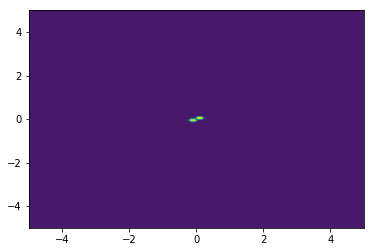

In [82]:
mean = [0, 0]; cov = [[0.0044, 0.002], [0.002, 0.0010]]
var = stats.multivariate_normal(mean=mean, cov=cov)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X; pos[:, :, 1] = Y
plt.contourf(X, Y, var.pdf(pos))
plt.show()

### Idea (need to prove)

When taking the inner product of two independentlynormal distributions, you get a 